<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [5]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.179104,28.089795,67.476438,-0.004967,152.740370,152.744127,-0.003758
1,0.0,1.0,41.953681,52.692717,63.806520,-0.004828,168.448090,168.451827,-0.003737
2,0.0,2.0,73.046270,73.930006,74.993139,0.000607,231.970023,231.970100,-0.000078
3,0.0,3.0,94.938494,45.039278,41.569622,0.004554,191.551949,191.546108,0.005840
4,0.0,4.0,58.538598,31.608458,76.844386,0.003492,176.994933,176.991112,0.003822
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.862381,26.521459,91.080378,0.031319,190.495536,190.469589,0.025948
29996,999.0,26.0,70.656060,69.333704,46.016237,0.001087,196.007089,196.003324,0.003764
29997,999.0,27.0,43.793845,52.662635,43.490411,0.000894,149.947786,149.946023,0.001763
29998,999.0,28.0,53.055546,28.680883,65.410998,-0.000063,157.147364,157.150714,-0.003350


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.179104,28.089795,67.476438,-0.004967,152.740370,152.744127,-0.003758
1,0.0,1.0,41.953681,52.692717,63.806520,-0.004828,168.448090,168.451827,-0.003737
2,0.0,2.0,73.046270,73.930006,74.993139,0.000607,231.970023,231.970100,-0.000078
3,0.0,3.0,94.938494,45.039278,41.569622,0.004554,191.551949,191.546108,0.005840
4,0.0,4.0,58.538598,31.608458,76.844386,0.003492,176.994933,176.991112,0.003822
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.862381,26.521459,91.080378,0.031319,190.495536,190.469589,0.025948
29996,999.0,26.0,70.656060,69.333704,46.016237,0.001087,196.007089,196.003324,0.003764
29997,999.0,27.0,43.793845,52.662635,43.490411,0.000894,149.947786,149.946023,0.001763
29998,999.0,28.0,53.055546,28.680883,65.410998,-0.000063,157.147364,157.150714,-0.003350


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    47.179104  28.089795  67.476438  ...  152.740370  152.744127 -0.003758
      1.0    41.953681  52.692717  63.806520  ...  168.448090  168.451827 -0.003737
      2.0    73.046270  73.930006  74.993139  ...  231.970023  231.970100 -0.000078
      3.0    94.938494  45.039278  41.569622  ...  191.551949  191.546108  0.005840
      4.0    58.538598  31.608458  76.844386  ...  176.994933  176.991112  0.003822
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   62.862381  26.521459  91.080378  ...  190.495536  190.469589  0.025948
      26.0   70.656060  69.333704  46.016237  ...  196.007089  196.003324  0.003764
      27.0   43.793845  52.662635  43.490411  ...  149.947786  149.946023  0.001763
      28.0   53.055546  28.680883  65.410998  ...  157.147364  157.150714 -0.003350
      29.0   30.036290  87.901609  59.769576  ...  187.711319  187.704136  0.007182

[30000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    47.179104  28.089795  67.476438  ...  152.740370  152.744127 -0.003758
      1.0    41.953681  52.692717  63.806520  ...  168.448090  168.451827 -0.003737
      2.0    73.046270  73.930006  74.993139  ...  231.970023  231.970100 -0.000078
      3.0    94.938494  45.039278  41.569622  ...  191.551949  191.546108  0.005840
      4.0    58.538598  31.608458  76.844386  ...  176.994933  176.991112  0.003822
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   62.862381  26.521459  91.080378  ...  190.495536  190.469589  0.025948
      26.0   70.656060  69.333704  46.016237  ...  196.007089  196.003324  0.003764
      27.0   43.793845  52.662635  43.490411  ...  149.947786  149.946023  0.001763
      28.0   53.055546  28.680883  65.410998  ...  157.147364  157.150714 -0.003350
      29.0   30.036290  87.901609  59.769576  ...  187.711319  187.704136  0.007182

[30000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.179104,28.089795,67.476438,-0.004967,152.740370,152.744127,-0.003758
1,0.0,1.0,41.953681,52.692717,63.806520,-0.004828,168.448090,168.451827,-0.003737
2,0.0,2.0,73.046270,73.930006,74.993139,0.000607,231.970023,231.970100,-0.000078
3,0.0,3.0,94.938494,45.039278,41.569622,0.004554,191.551949,191.546108,0.005840
4,0.0,4.0,58.538598,31.608458,76.844386,0.003492,176.994933,176.991112,0.003822
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,62.862381,26.521459,91.080378,0.031319,190.495536,190.469589,0.025948
29996,999.0,26.0,70.656060,69.333704,46.016237,0.001087,196.007089,196.003324,0.003764
29997,999.0,27.0,43.793845,52.662635,43.490411,0.000894,149.947786,149.946023,0.001763
29998,999.0,28.0,53.055546,28.680883,65.410998,-0.000063,157.147364,157.150714,-0.003350


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    47.179104  28.089795  67.476438  ...  152.740370  152.744127 -0.003758
      1.0    41.953681  52.692717  63.806520  ...  168.448090  168.451827 -0.003737
      2.0    73.046270  73.930006  74.993139  ...  231.970023  231.970100 -0.000078
      3.0    94.938494  45.039278  41.569622  ...  191.551949  191.546108  0.005840
      4.0    58.538598  31.608458  76.844386  ...  176.994933  176.991112  0.003822
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   62.862381  26.521459  91.080378  ...  190.495536  190.469589  0.025948
      26.0   70.656060  69.333704  46.016237  ...  196.007089  196.003324  0.003764
      27.0   43.793845  52.662635  43.490411  ...  149.947786  149.946023  0.001763
      28.0   53.055546  28.680883  65.410998  ...  157.147364  157.150714 -0.003350
      29.0   30.036290  87.901609  59.769576  ...  187.711319  187.704136  0.007182

[30000 rows x 7 columns]

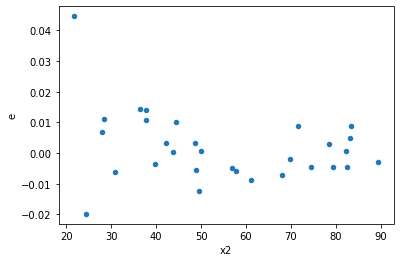

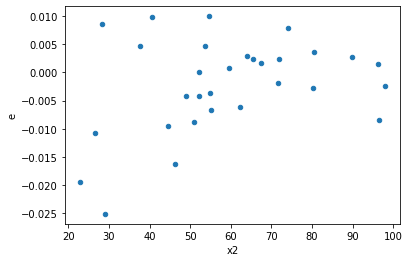

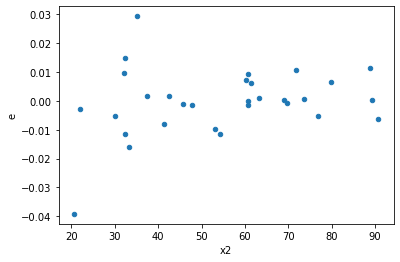

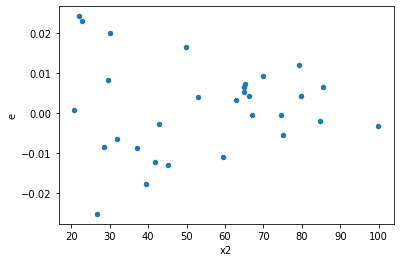

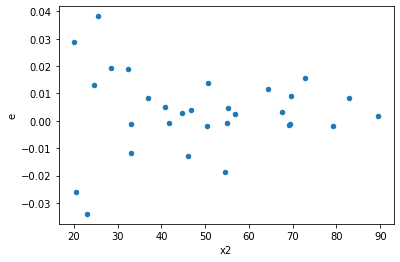

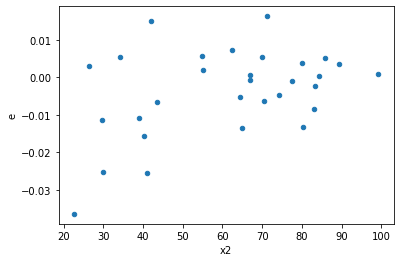

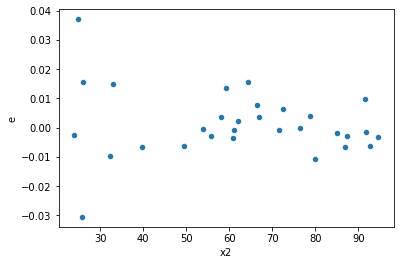

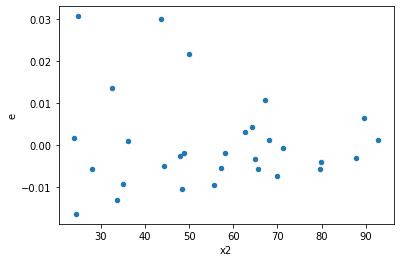

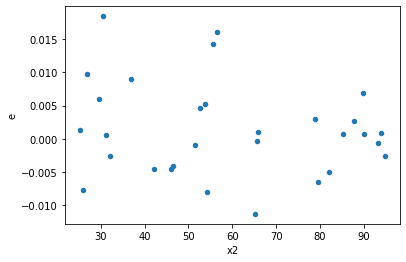

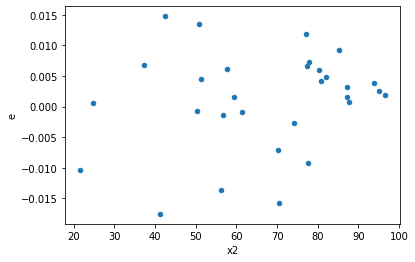

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
82.0,9.0,9.0,0.00028156540953463033,0.0004779874674601923,3.128504550384782e-05,5.310971860668803e-05,1.6976072034210707,0.44259455964483685,0.7787027201775816,0.22129727982241842,Reject005=1 : Homoscedasticity
97.0,9.0,9.0,0.0004571999551720988,0.0009978842642506046,5.079999501912209e-05,0.00011087602936117828,2.1825992171739865,0.26050716341481506,0.8697464182925925,0.13025358170740753,Reject005=1 : Homoscedasticity
103.0,9.0,9.0,0.000341012837513172,0.00035767745118406763,3.789031527924133e-05,3.9741939020451956e-05,1.0488679950949118,0.9445062108005717,0.5277468945997141,0.47225310540028587,Reject005=1 : Homoscedasticity
171.0,9.0,9.0,0.0006051950046130086,0.0007194162787892647,6.72438894014454e-05,7.993514208769609e-05,1.1887346612341834,0.8009703206106589,0.5995148396946706,0.40048516030532944,Reject005=1 : Homoscedasticity
277.0,9.0,9.0,0.00014588484162035572,0.00036192350218499687,1.620942684670619e-05,4.021372246499965e-05,2.4808849100775707,0.19206559113050958,0.9039672044347452,0.09603279556525479,Reject005=1 : Homoscedasticity
410.0,9.0,9.0,0.00020785971014204095,0.00021450664094727585,2.309552334911566e-05,2.3834071216363985e-05,1.031977966296079,0.9633707173366133,0.5183146413316934,0.48168535866830664,Reject005=1 : Homoscedasticity
538.0,9.0,9.0,0.00035441447473612573,0.00040006205221696466,3.937938608179175e-05,4.445133913521829e-05,1.128797159074344,0.8597378540054741,0.570131072997263,0.42986892700273704,Reject005=1 : Homoscedasticity
825.0,9.0,9.0,0.0002985417932136608,0.0005307621633815644,3.3171310357073426e-05,5.897357370906271e-05,1.7778487818009043,0.4042875014174281,0.797856249291286,0.20214375070871404,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.0006575240943293289,0.00018016734753679682,7.305823270325877e-05,2.0018594170755203e-05,0.2740087383726471,0.06722491853224986,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,0.002248442961516798,9.827780299470599e-05,0.00024982699572408866,1.0919755888300665e-05,0.04370927111640308,7.380884774794133e-05,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,0.0016434162402769765,0.00011383902095027399,0.0001826018044752196,1.2648780105586e-05,0.06926974320947925,0.0004909378103924503,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,0.001287052859363108,0.00012029404502402003,0.00014300587326256754,1.3366005002668893e-05,0.09346472769078575,0.0016051287630994822,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,0.0011241457217568314,9.744778754096448e-05,0.00012490508019520348,1.0827531948996054e-05,0.08668608139936845,0.0011969561875959276,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,0.003834678679031886,0.00021428960889949798,0.0004260754087813207,2.3809956544388665e-05,0.055882024762919154,0.00020480980792305975,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,0.003810462169244619,0.0001277906945635828,0.0004233846854716243,1.4198966062620312e-05,0.03353679655843844,2.4075642911610978e-05,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,0.00044240615060741023,0.00019563376680066755,4.915623895637892e-05,2.173708520007417e-05,0.4422039940721174,0.23997426459250684,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,0.000951393207625084,0.00028908977234473637,0.00010571035640278711,3.212108581608182e-05,0.3038594032706802,0.09070888542618875,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    811
Reject005=1 : Homoscedasticity      189
Name: Result_test, dtype: int64